# Exploratory Analysis Of Kickstarter Data
 - Kickstarter is an American public benefit corporation based in Brooklyn, New York, that maintains a global crowdfunding platform focused on creativity <br>
 - The company's stated mission is to "help bring creative projects to life" <br>
 - As of December 2019, Kickstarter has received more than $4.6 billion in pledges from 17.2 million backers to fund 445,000 projects
 
## Dataset
 - The dataset is made available by General Assembly
 - There are 45,957 observations and 17 features
 
## Interesting facts about the data:
 - Shortest successful campaign was for one day to raise 500 dollars for a camera  <br> 
 - Longest successful campaign was for 92 days to raise 7500 dollars for a documentary  
 - Highest goal amount for a successful campaign (Video Game) was 900K dollars and it raised nearly 3 million dollars by 61K backers in merely 35 days  
 - Pebble-E Watch for Android and Iphone raised 10 million dollars, 100 times their goal amount by 68K backers in 38 days  
 
## Analysis Objective:
 - We want to be able to provide recommendations to project teams seeking to raise funds using crowfunding on Kickstarter
 - What is the best length of time to run a campaign?
 - What is an ideal pledge goal?
 - What type of projects would be most successful at getting funded?
 - Is there an ideal month/day to launch a campaign?
 
[Presentation Slides](https://drive.google.com/file/d/1b_2aO6fQ_k1-p9mHhu7uQz67l6nKelf2/view?usp=sharing)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
kick = pd.read_csv('DSI_kickstarterscrape_dataset.csv')

In [3]:
kick.shape

(45957, 17)

In [4]:
kick.head(5)

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


In [5]:
#Check for NaNs
kick.isnull().sum(axis=0)

project id              0
name                    0
url                     0
category                0
subcategory             0
location             1322
status                  0
goal                    0
pledged                12
funded percentage       0
backers                 0
funded date             0
levels                  0
reward levels          59
updates                 0
comments                0
duration                0
dtype: int64

 <font color=red>_We have 1322 NaN locations, 12 NaN pledges and 59 NaN reward levels. These need to be taken care of before we can build a machine learning model_</font>

In [6]:
#Interesting facts about the data
# Successful campaign with shortest duration
kick[kick.status=='successful'].sort_values(by='duration', ascending=True).iloc[0,:]

project id                                                  1728704935
name                                Help RonenV.com Get A New Camera!!
url                  http://www.kickstarter.com/projects/ronen/help...
category                                                   Photography
subcategory                                                Photography
location                                                           NaN
status                                                      successful
goal                                                               500
pledged                                                            500
funded percentage                                                    1
backers                                                              7
funded date                            Tue, 01 Dec 2009 23:05:00 -0000
levels                                                               2
reward levels                                                 $20,$350
update

<font color=blue>Shortest successful campaign was for one day to raise $500 for a camera</font>

In [7]:
# Successful campaign with longest duration
kick[kick.status=='successful'].sort_values(by='duration', ascending=False).iloc[0,:]

project id                                                   144788399
name                 Traditions Build Winners as the Snipe Class tu...
url                  http://www.kickstarter.com/projects/1719722064...
category                                              Film &amp; Video
subcategory                                                Documentary
location                                             San Francisco, CA
status                                                      successful
goal                                                              7500
pledged                                                           7625
funded percentage                                              1.01667
backers                                                             56
funded date                            Thu, 31 Mar 2011 21:22:08 -0000
levels                                                               5
reward levels                                 $25,$75,$125,$250,$2,500
update

<font color=blue>Longest successful campaign was for 92 days to raise $7500 for a documentary</font>

In [8]:
#Successful campaign with highest goal amount
kick[kick.status=='successful'].sort_values(by='goal', ascending=False).iloc[0,:]

project id                                                  2000827215
name                                                       Wasteland 2
url                  http://www.kickstarter.com/projects/inxile/was...
category                                                         Games
subcategory                                                Video Games
location                                             Newport Beach, CA
status                                                      successful
goal                                                            900000
pledged                                                    2.93325e+06
funded percentage                                              3.25917
backers                                                          61290
funded date                            Tue, 17 Apr 2012 12:05:42 -0000
levels                                                              15
reward levels        $15,$30,$50,$55,$75,$100,$150,$150,$250,$500,$...
update

<font color=blue>Highest goal amount for a successful campaign was 900K USD and it raised nearly 3 million dollars by 61K backers in merely 35 days</font>

In [9]:
#Success campaign with highest pledge amount
kick.sort_values(by='pledged', ascending=False).iloc[0,:]

project id                                                   506924864
name                      Pebble: E-Paper Watch for iPhone and Android
url                  http://www.kickstarter.com/projects/597507018/...
category                                                        Design
subcategory                                             Product Design
location                                                 Palo Alto, CA
status                                                      successful
goal                                                            100000
pledged                                                    1.02668e+07
funded percentage                                              102.668
backers                                                          68929
funded date                            Sat, 19 May 2012 03:00:00 -0000
levels                                                              11
reward levels        $1,$99,$115,$125,$220,$235,$240,$550,$1,000,$1...
update

<font color=blue>Pebble-E Watch for Android and Iphone raised 10 million dollars, 100 times their goal amount by 68K backers in 38 days</font>

In [10]:
#Mean Goal
kick.goal.mean(skipna=True)

11942.709521509238

In [11]:
kick.goal.describe()

count    4.595700e+04
mean     1.194271e+04
std      1.887583e+05
min      1.000000e-02
25%      1.800000e+03
50%      4.000000e+03
75%      9.862000e+03
max      2.147484e+07
Name: goal, dtype: float64

<font color=blue>
 - 75% of the campaigns have a goal of less than 10,000 dollars <br>
</font>

In [12]:
#Mean pledge 
kick.pledged.mean(skipna=True)

4980.749678963979

In [13]:
kick.pledged.describe()

count    4.594500e+04
mean     4.980750e+03
std      5.674162e+04
min      0.000000e+00
25%      1.960000e+02
50%      1.310000e+03
75%      4.165000e+03
max      1.026684e+07
Name: pledged, dtype: float64

<font color=blue>
 - There are outliers here as well <br>
 - 75% of the campaigns have pledged amount less than 4200 <br>
 - We have some pledges in millions <br>
</font>    

In [14]:
kick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45957 entries, 0 to 45956
Data columns (total 17 columns):
project id           45957 non-null int64
name                 45957 non-null object
url                  45957 non-null object
category             45957 non-null object
subcategory          45957 non-null object
location             44635 non-null object
status               45957 non-null object
goal                 45957 non-null float64
pledged              45945 non-null float64
funded percentage    45957 non-null float64
backers              45957 non-null int64
funded date          45957 non-null object
levels               45957 non-null int64
reward levels        45898 non-null object
updates              45957 non-null int64
comments             45957 non-null int64
duration             45957 non-null float64
dtypes: float64(4), int64(5), object(8)
memory usage: 6.0+ MB


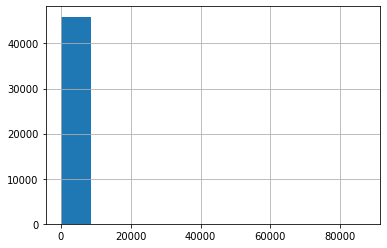

In [15]:
#Plotting distribution of number of backers
kick.backers.hist()
plt.show()

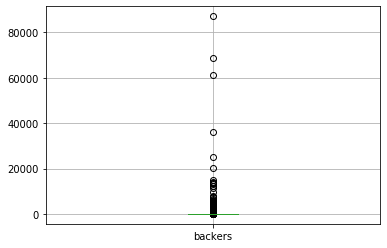

In [16]:
# It appears we have large number of projects with small number of backers and have some outliers with pretty high number of backers
kick.boxplot('backers')
plt.show()

In [17]:
kick.backers.describe()

count    45957.000000
mean        69.973192
std        688.628479
min          0.000000
25%          5.000000
50%         23.000000
75%         59.000000
max      87142.000000
Name: backers, dtype: float64

<font color=blue>
 - 75% of the campaigns have 59 or less number of backers <br>
 - We also have a campaign with 87,000 plus backers <br>
 - Here the Inter Quartile Range for number of backers is 59 - 5 = 54 <br>
 - Using 1.5*IQR rules for outliers, any project with more than 1.5*54=81 backers is an outlier <br>
</font>

In [18]:
#Calculating Skew of number of backers
kick.backers.skew()

87.47397431084505

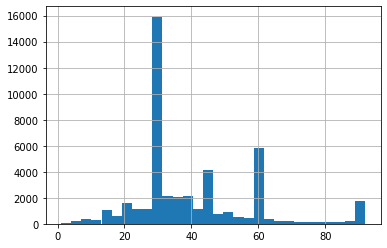

In [19]:
kick.duration.hist(bins=30)
plt.show()

<font color=blue>Duration variable is not normally distributed</font>

In [20]:
# Convert features to appropriate types
kick.status = kick.status.astype('category')
kick.location = kick.location.astype('category')
kick.category = kick.category.astype('category')
kick.subcategory = kick.subcategory.astype('category')
kick['funded date'] = pd.to_datetime(kick['funded date'])

In [21]:
kick[kick.status=='successful'].duration.describe()

count    22969.000000
mean        37.960475
std         16.651234
min          1.000000
25%         30.000000
50%         31.000000
75%         45.000000
max         91.960000
Name: duration, dtype: float64

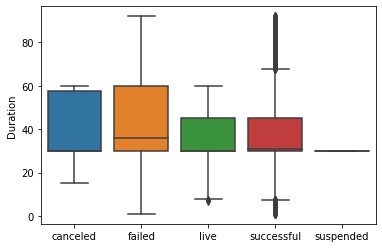

In [22]:
sns.boxplot(x='status', y='duration', data=kick)
plt.xlabel('')
plt.ylabel('Duration')
plt.savefig('duration_status.png')

<font color=blue>
 - The box-plots between campaign duration and stasues show that on average successful campaigns have lower duration than failed ones <br>
 - Median duration is 31 days for successful campaigns
</font>

In [23]:
list(kick.category.unique())

['Film & Video',
 'Games',
 'Fashion',
 'Music',
 'Art',
 'Technology',
 'Dance',
 'Publishing',
 'Theater',
 'Comics',
 'Design',
 'Photography',
 'Food',
 'Film &amp; Video']

<font color=blue>What is the difference between "Film & Video" and "Film &amp; Video" ???</font>

In [24]:
kick[kick.category == "Film &amp; Video"].head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
1548,70883741,"The Zuma Dogg Show (&quot;Comedy-genius, Brain...",http://www.kickstarter.com/projects/1137848748...,Film &amp; Video,Webseries,"Los Angeles, CA",failed,10000.0,0.0,0.0000,0,2011-06-17 23:36:50+00:00,7,"$10,$25,$50,$100,$250,$500,$1,000",0,0,21.00
1551,71006313,Butterflies Wake,http://www.kickstarter.com/projects/butterflie...,Film &amp; Video,Short Film,"Charleston, SC",successful,2000.0,2000.0,1.0000,40,2011-01-03 02:41:19+00:00,2,"$25,$25",5,2,60.04
1556,71503212,Your Chance To Be A Part Of An Indie Horror Film,http://www.kickstarter.com/projects/218163736/...,Film &amp; Video,Film &amp; Video,"Dayton, OH",successful,200.0,276.0,1.3800,12,2011-05-12 21:55:23+00:00,7,"$1,$5,$20,$50,$75,$100,$150",0,4,40.00
1561,71715000,Comedy Movie &quot;Come Back and See Us&quot; ...,http://www.kickstarter.com/projects/115350971/...,Film &amp; Video,Film &amp; Video,"San Antonio, TX",failed,20000.0,0.0,0.0000,0,2012-02-06 17:28:16+00:00,11,"$5,$10,$25,$50,$100,$250,$500,$1,000,$2,500,$5...",0,0,46.00
1577,72199235,Help bring James Joyce to the big screen,http://www.kickstarter.com/projects/1569435839...,Film &amp; Video,Narrative Film,"Paris, France",failed,20000.0,788.0,0.0394,18,2011-08-16 03:12:19+00:00,10,"$5,$10,$25,$50,$100,$250,$500,$1,000,$2,500,$5...",2,0,60.00


In [25]:
kick[kick.category == "Film & Video"].head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,2011-08-19 19:28:17+00:00,7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,2012-06-08 00:00:31+00:00,10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,2012-04-08 02:14:00+00:00,13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
5,316217,Dinner Party - a short film about friendship.....,http://www.kickstarter.com/projects/249354515/...,Film & Video,Short Film,"Portland, OR",successful,3500.0,3582.0,1.023331,39,2011-06-22 13:33:00+00:00,7,"$5,$25,$50,$100,$250,$500,$1,000",8,0,21.43
6,325034,Mezzo,http://www.kickstarter.com/projects/geoffsaysh...,Film & Video,Short Film,"Collegedale, TN",failed,1000.0,280.0,0.280000,8,2012-02-18 02:17:08+00:00,5,"$5,$10,$25,$50,$100",0,0,30.00


<font color=blue>It appears to be a typing mistake. Assuming they are same. Update "Film &amp; Video" to "Film & Video"</font>

In [26]:
#Update "Film &amp; Video" to "Film & Video"
kick.loc[kick.category=="Film &amp; Video",'category'] = "Film & Video"

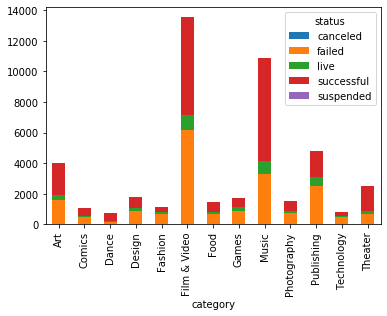

In [50]:
kick.groupby(['category', 'status']).size().unstack().fillna(0).plot(kind='bar', stacked=True)

<font color=blue>
Here we see that <br>
 - Music and Film & Video projects had high number of successes but they also had high number of failures <br>
 - Number of projects is also high for these categories <br>
 - We need to look at percentage of successful and failed projects in each category to get a better picture <br>
</font>    

In [28]:
# Get percentage of projects by category and status
category_status = kick.groupby(['category','status']).size().unstack().fillna(0)
category_status.loc[:,'canceled':'suspended'] = category_status.loc[:,'canceled':'suspended'].div(category_status.sum(axis=1), axis=0)*100
category_status = np.round(category_status,2)

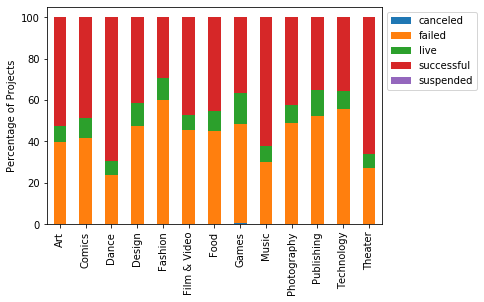

In [29]:
# Plot a stacked bar chart
category_status.plot(kind='bar', stacked=True)
plt.ylabel("Percentage of Projects")
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.30,1), loc='upper right')
plt.show()

<font color=blue>
 - Seventy percent of the campaigns in Dance category were successful <br>
 - Sixty percent of the campaigns in Fashion category failed <br>
 - Plot suggests that a campaign in Art, Dance, Music and Theater categories have higher chances of being successful than the rest <br>
</font>

In [30]:
# Explore goal
kick.goal.describe()

count    4.595700e+04
mean     1.194271e+04
std      1.887583e+05
min      1.000000e-02
25%      1.800000e+03
50%      4.000000e+03
75%      9.862000e+03
max      2.147484e+07
Name: goal, dtype: float64

<font color=blue>There is a large variation in pledge goal. It goes from a penny to millions of dollars. However, majority of the projects have their goal in thousands with median around 4,000 </blue>

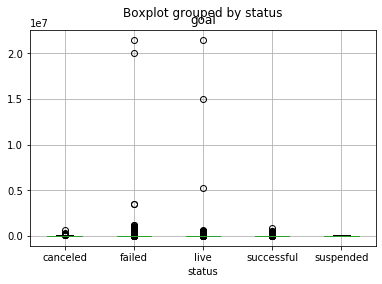

In [31]:
# Plot a box plot
kick.boxplot(column='goal', by='status')

<font color=blue>We cannot infer much from this boxplot because of the variation in goal amount. Plotting the log transformed values of goal will paint a better picture. Let's try that</font>

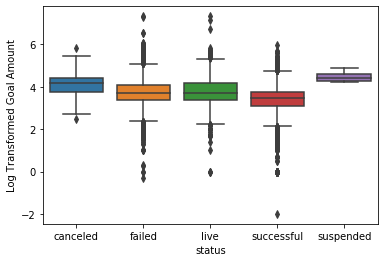

In [32]:
#Log transform goal amount
kick.loc[:,'log_goal'] = np.log10(kick.goal)
sns.boxplot(y='log_goal', x='status', data=kick)
plt.ylabel('Log Transformed Goal Amount')
plt.show()

<font color=blue>
 - This boxplot shows that lower goal amount usually leads to a successful campaign <br>
 - Median goal amount for successful campaign is around 4,000 dollars <br>
</font>

In [33]:
# Get year and month from funded date column to see if they play a role in determining the outcome of campaign
kick.loc[:,'year']=pd.DatetimeIndex(kick['funded date']).year
kick.loc[:,'month']=pd.DatetimeIndex(kick['funded date']).month

kick.year = kick.year.astype('category')

In [34]:
# Get percentage of project by year and status
year_status = kick.groupby(['year','status']).size().unstack().fillna(0)
year_status.loc[:,'canceled':'suspended'] = year_status.loc[:,'canceled':'suspended'].div(year_status.sum(axis=1),axis=0)*100
year_status = np.round(year_status,2)

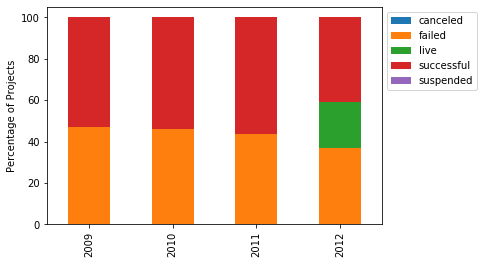

In [35]:
#plotting a stacked bar chart
year_status.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.3,1))
plt.xlabel('')
plt.ylabel('Percentage of Projects')
plt.show()

<font color=blue>
 - We have about same percentage of successful and failed campaigns every year <br>
 - Some of the campaigns were still live in 2012 showing as green in the plot above <br>
</font>

In [36]:
# Convert numerical month to month abbreviation
from pandas.api.types import CategoricalDtype
import calendar
kick.month = kick.month.apply(lambda x: calendar.month_abbr[x])
month_ordered = CategoricalDtype(categories = calendar.month_abbr[1:13], ordered=True)
kick.month = kick.month.astype(month_ordered)

In [37]:
# Get percentage of project by month and status
month_status = kick.groupby(['month', 'status']).size().unstack().fillna(0)
month_status.loc[:,'canceled':'suspended'] = month_status.loc[:,'canceled':'suspended'].div(month_status.sum(axis=1), axis=0)*100
month_status = np.round(month_status,2)

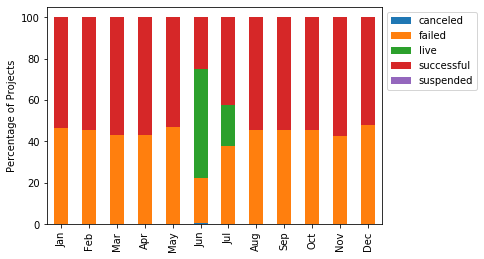

In [38]:
# plotting a stacked bar chart
month_status.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.3,1))
plt.xlabel('')
plt.ylabel('Percentage of Projects')
plt.show()

<font color=blue>
 - Launch month does not appear to have any impact on the success or failure of the campaign <br>
 - Green bars represent the projects that were still live in the month of Jun/July <br>
<font>

In [39]:
# creating a day of the week column from funded date
kick.loc[:,'day']=pd.DatetimeIndex(kick['funded date']).weekday
kick.day = kick.day.apply(lambda x: calendar.day_abbr[x])
day_category = CategoricalDtype(categories=calendar.day_abbr[0:8], ordered=True)
kick.day = kick.day.astype(day_category)
day_status = kick.groupby(['day','status']).size().unstack().fillna(0)

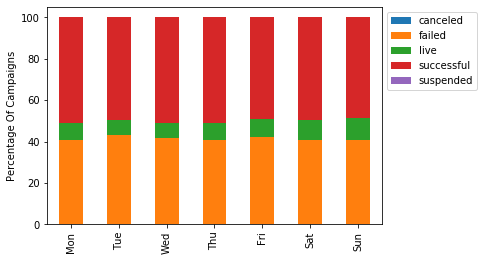

In [40]:
# Get percentage of project by day and status
day_status = day_status.div(day_status.sum(axis=1), axis=0)*100
day_status = np.round(day_status, 2)
day_status.plot(kind='bar', stacked=True)
plt.ylabel('Percentage Of Campaigns')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

<font color=blue>
 - Launch day of the week does not appear to have any impact on the success or failure of the campaign <br>
 - Percentage of successful campaigns remains consistent throughout the week <br>
</font>

In [41]:
#create a day of the month column
kick.loc[:,'day_of_month']=pd.DatetimeIndex(kick['funded date']).day
day_of_month_status = kick.groupby(['day_of_month','status']).size().unstack().fillna(0)

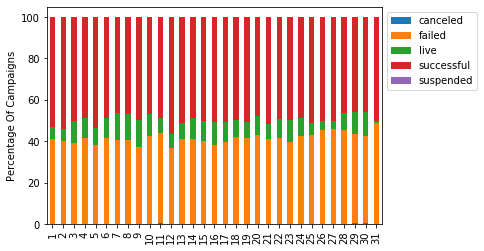

In [42]:
#Get percentage of projects by day of the month and status
day_of_month_status = day_of_month_status.div(day_of_month_status.sum(axis=1), axis=0)*100
day_of_month_status = np.round(day_of_month_status, 2)
day_of_month_status.plot(kind='bar', stacked=True)
plt.ylabel('Percentage Of Campaigns')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

<font color=blue>
 - The day of the month does not appear to have any impact on the outcome of the campaign either <br>
</font>

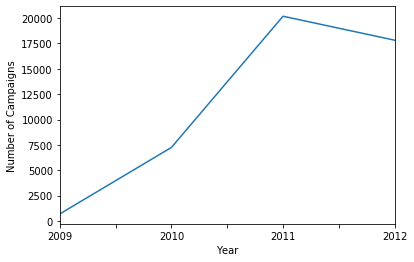

In [43]:
kick.groupby(['year']).size().plot()
plt.xlabel('Year')
plt.ylabel('Number of Campaigns')
plt.show()

<font color=blue>
 - The number of campaigns shot up from hundreds to thousands in a couple of years <br>
 - We do not have complete data for 2012 and that might exmplain the dip <br>
</font>    

In [44]:
kick.pledged.sum()/kick.backers.sum()

71.16224044222233

<font color=blue>
 - On average backers pledge 71 dollars for a campaign

In [45]:
# Get pledge per backer by category
cat_pledged_backer = kick.groupby(['category']).agg( {'pledged': 'sum' , 'backers':'sum'})
cat_pledged_backer.loc[:,'average_pledge'] = cat_pledged_backer['pledged']/cat_pledged_backer['backers']

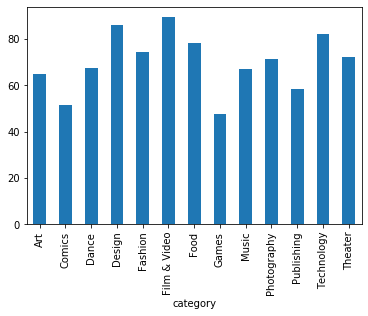

In [46]:
#Plotting bar chart
cat_pledged_backer.dropna().average_pledge.plot(kind='bar')
plt.show()

<font color=blue>
 - Film & Video category has the highest average pledge in the vicinity of 90 dollars
</font>